# Numerical root-finding
Given equation:
\begin{align}
f(x) = 2\sin\sqrt{x} - x + 1
\end{align}

## Graphical method

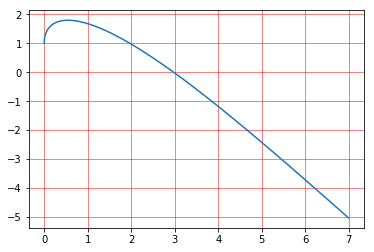

In [3]:
from math import sqrt
from math import sin
from math import cos
from math import fabs
from matplotlib import pyplot as plt
%matplotlib inline


def f(x_array):   
    if isinstance(x_array, list):
        return [2*sin(sqrt(x)) - x + 1 for x in x_array]
    return 2*sin(sqrt(x_array)) - x_array + 1

def df(x_array):   
    if isinstance(x_array, list):
        return [cos(sqrt(x))/sqrt(x) - 1 for x in x_array]
    return cos(sqrt(x_array))/sqrt(x_array) - 1


lower = 0
upper = 7
length = 1000
x = [lower + x*(upper-lower)/length for x in range(length)]
plt.plot(x, f(x))
plt.grid(color='r', linestyle='-', linewidth=0.5)
plt.show()

It can be clearly seen that the root is between 2.5 and 3.5. Let's extend analysis by zooming.

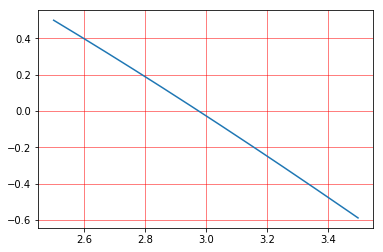

In [39]:
lower = 2.5
upper = 3.5
length = 1000
x = [lower + x*(upper-lower)/length for x in range(length)]
plt.plot(x, f(x))
plt.grid(color='r', linestyle='-', linewidth=0.5)
plt.show()

So, with 0.1 precision we found that the root is between 2.9 and 3. This is our raw graphical estimation of the root.

## Implementation and usage of Bisection method

In [10]:
def bisection(function, lower, upper, precision, x_r_old = 0):
    x_r = 0.5*(upper + lower)
    if fabs((x_r - x_r_old)/x_r) < precision:
        return x_r_old, [fabs((x_r - x_r_old)/x_r)]
    if function(lower) * function(x_r) > 0:
        lower = x_r
    elif function(lower) * function(x_r) < 0:
        upper = x_r
    else:
        return x_r, [0]
    rec = bisection(function, lower, upper, precision, x_r)
    return rec[0], [fabs((x_r - x_r_old)/x_r)*100] + rec[1]


bisect_result = bisection(f, 0, 5, 1e-10)
print("According to Bisection approach the root of the given equation is: " + str(bisect_result[0]))

According to Bisection approach the root of the given equation is: 2.976215688395314


## Implementation and usage of False-Position method

In [11]:
def false_pos(function, lower, upper, precision, x_r_old = 0):
    x_r = upper - (function(upper)*(lower - upper))/(function(lower) - function(upper))
    if fabs((x_r - x_r_old)/x_r) < precision:
        return x_r_old, [fabs((x_r - x_r_old)/x_r)]
    if function(lower) * function(x_r) > 0:
        lower = x_r
    elif function(lower) * function(x_r) < 0:
        upper = x_r
    else:
        return x_r, [0]
    rec = false_pos(function, lower, upper, precision, x_r)
    return rec[0], [fabs((x_r - x_r_old)/x_r)*100] + rec[1]


false_pos_result = false_pos(f, 0, 5, 1e-10)
print("According to False-Position approach the root of the given equation is: " + str(false_pos_result[0]))

According to False-Position approach the root of the given equation is: 2.9762156879372084


## Implementation and usage of Fixed-Point Iteration method

In [12]:
def fixed_pnt(function, precision, x_r_old):
    x_r = function(x_r_old) + x_r_old
    if fabs((x_r - x_r_old)/x_r) < precision:
        return x_r, [fabs((x_r - x_r_old)/x_r)]
    rec = fixed_pnt(function, precision, x_r)
    return rec[0], [fabs((x_r - x_r_old)/x_r)*100] + rec[1]


fixed_pnt_result = fixed_pnt(f, 1e-10, 1)
print("According to Fixed-Point approach the root of the given equation is: " + str(fixed_pnt_result[0]))

According to Fixed-Point approach the root of the given equation is: 2.9762156880341646


## Implementation and usage of Newton-Raphson method

In [13]:
def new_rap(function, dfunction, precision, x_r_old):
    x_r = x_r_old - function(x_r_old)/dfunction(x_r_old)
    if fabs((x_r - x_r_old)/x_r) < precision:
        return x_r, [fabs((x_r - x_r_old)/x_r)]
    rec = new_rap(function, dfunction, precision, x_r)
    return rec[0], [fabs((x_r - x_r_old)/x_r)*100] + rec[1]


new_rap_result = new_rap(f, df, 1e-10, 1)
print("According to Newton-Raphson approach the root of the given equation is: " + str(new_rap_result[0]))

According to Newton-Raphson approach the root of the given equation is: 2.976215688041108


## Error analysis

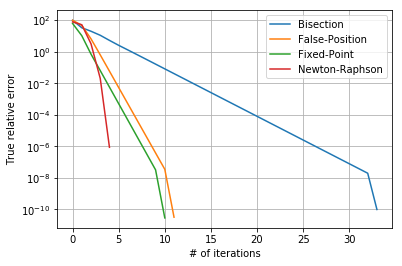

In [15]:
plt.semilogy(bisect_result[1], label = 'Bisection')
plt.semilogy(false_pos_result[1], label = 'False-Position')
plt.semilogy(fixed_pnt_result[1], label = 'Fixed-Point')
plt.semilogy(new_rap_result[1][:-1], label = 'Newton-Raphson')
plt.legend()
plt.grid()
plt.ylabel('True relative error')
plt.xlabel('# of iterations')
plt.show()

From above plot it is seen that relative error functions of Fixed-Point, False-Position and Bisection methods are linear after 2nd iteration. This is due to proportional relation between iterative estimations. In general, practical convergence rate confirms theoretical expectations of the algorithms.

## Maximum precision test

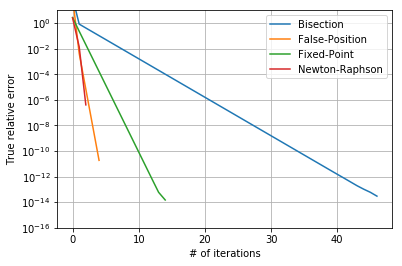

In [16]:
plt.semilogy(bisection(f, 2.9, 3.0, 1e-30)[1][:-1], label = 'Bisection')
plt.semilogy(false_pos(f, 2.9, 3.0, 1e-30)[1][:-1], label = 'False-Position')
plt.semilogy(fixed_pnt(f, 1e-30, 2.9)[1][:-1], label = 'Fixed-Point')
plt.semilogy(new_rap(f, df, 1e-30, 2.9)[1][:-1], label = 'Newton-Raphson')
plt.ylim(1e-16, 1e+1)
plt.legend()
plt.grid()
plt.ylabel('True relative error')
plt.xlabel('# of iterations')
plt.show()

According to graph above, Bisection and Fixed-Point methods reach about 10^-14 error. False-Position and Newton-Raphson methods reach 10^-11 and 10^-7 precisions respectively. The test was done by setting precision parameters as 10^-30.

## Execution performance (dependence on parameters)

According to error function plots it is clearly seen that Newton-Raphson method is the fastest way of root estimation, however it have lowest precision in comparison with other 3 approaches. Newton-Raphson method have only one tunable parameter which is initial guess. Let's try different initial guesses to test its effects.

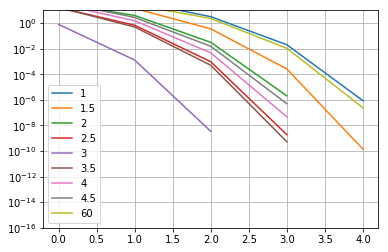

In [17]:
plt.semilogy(new_rap(f, df, 1e-30, 1)[1][:-1], label = '1')
plt.semilogy(new_rap(f, df, 1e-30, 1.5)[1][:-1], label = '1.5')
plt.semilogy(new_rap(f, df, 1e-30, 2)[1][:-1], label = '2')
plt.semilogy(new_rap(f, df, 1e-30, 2.5)[1][:-1], label = '2.5')
plt.semilogy(new_rap(f, df, 1e-30, 3)[1][:-1], label = '3')
plt.semilogy(new_rap(f, df, 1e-30, 3.5)[1][:-1], label = '3.5')
plt.semilogy(new_rap(f, df, 1e-30, 4)[1][:-1], label = '4')
plt.semilogy(new_rap(f, df, 1e-30, 4.5)[1][:-1], label = '4.5')
plt.semilogy(new_rap(f, df, 1e-30, 60)[1][:-1], label = '60')
plt.ylim(1e-16, 1e+1)
plt.legend()
plt.grid()
plt.show()

From above graph it is clearly seen that initial guess parameter determines convergence rate and even precision value. The fastest convergence was performed using 3.0 as initial guess (which is very close to actual root) with only 2 iterations. Initial values 1, 1.5 and 60 converged after 4 iterations. Executions with other arguments converged in 3 iterations. 

Interesting observation is that initial guesses of 1.5 and 60 converged in 4 iterations both (may be because of quadratic convergence), so farness of initial guess from actual value does not really determine the rate of convergence. For comparison reasons, let's test our linearly converging algorithm Fixed-Point iteration method.

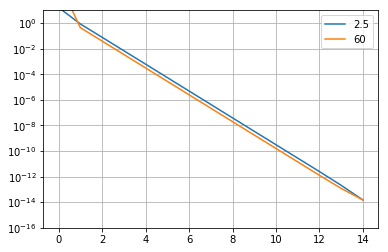

In [18]:
plt.semilogy(fixed_pnt(f, 1e-30, 2.5)[1][:-1], label = '2.5')
plt.semilogy(fixed_pnt(f, 1e-30, 60)[1][:-1], label = '60')
plt.ylim(1e-16, 1e+1)
plt.legend()
plt.grid()
plt.show()

Same situation here, initial guesses of 60 and 2.5 converging at 14th iteration. So the reason of convergence rate independence of initial guess is not a quadratic error minimization.

## Conclusion

The given assignment's goal is to give a practical experience of various root-finding algorithm implementations and usage of them. Bracketing and Fixed-Point iterative methods are linearly converging algorithms which are dependent on various parameters defining convergence rates and precision values. Newton-Raphson method is a fastest method among these 4 approaches (quadratic error function), however it pays with precision limit. From observations, for high precision its better to use Fixed-Point algorithm which have similar to Bisection accuracy, but faster by more than twice. 